# 8) Data Visualization I
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about 
the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we 
can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger
is distributed by plotting a histogram.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  datasource="https://www.geeksforgeeks.org/python-titanic-data-eda-using-seaborn/"

In [5]:
titanic=pd.read_csv("titanic.csv")

In [6]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

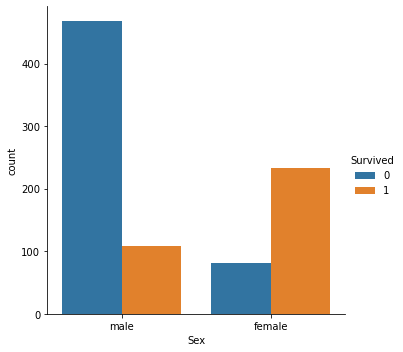

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic)


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

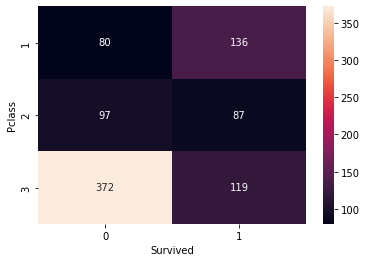

In [9]:
# Group the dataset by Pclass and Survived and then unstack them
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")


<AxesSubplot:xlabel='Sex', ylabel='Age'>

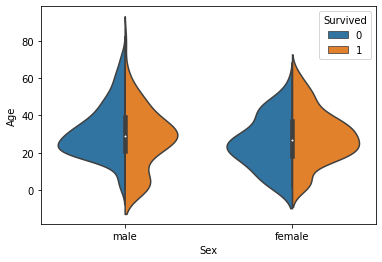

In [10]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic, split = True)


C:\Users\baska\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\baska\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


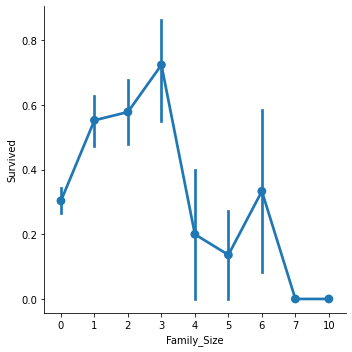

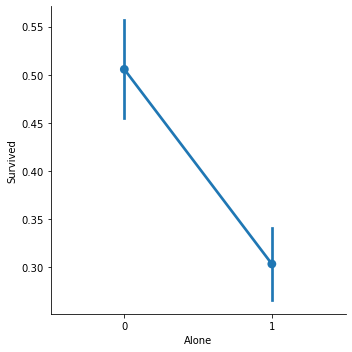

In [11]:
# Adding a column Family_Size
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp']

# Adding a column Alone
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = titanic)

# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = titanic)


<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

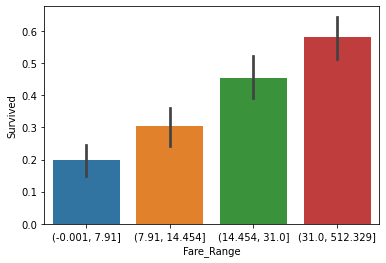

In [13]:
# Divide Fare into 4 bins
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = titanic)


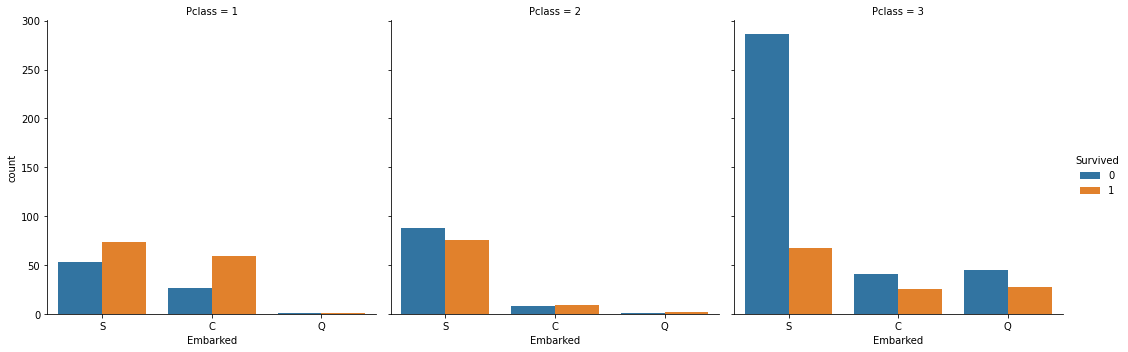

In [14]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = titanic)


In [15]:
datasource="https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-1/"

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

dataset = sns.load_dataset('titanic')

dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\baska\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

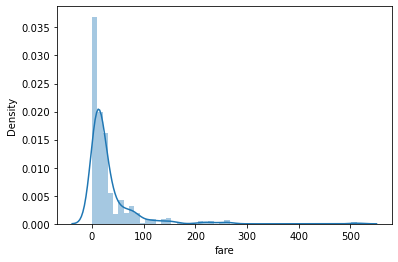

In [17]:
sns.distplot(dataset['fare'])

C:\Users\baska\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare'>

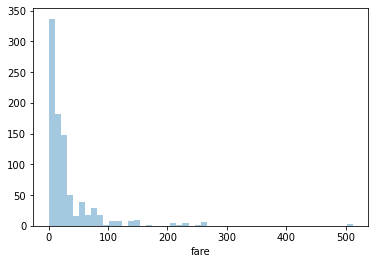

In [18]:
sns.distplot(dataset['fare'], kde=False)

<AxesSubplot:xlabel='fare'>

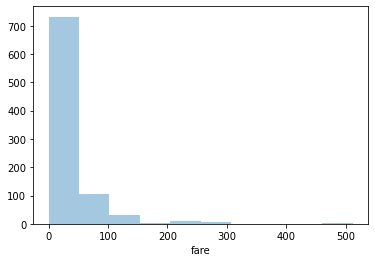

In [19]:
sns.distplot(dataset['fare'], kde=False, bins=10)

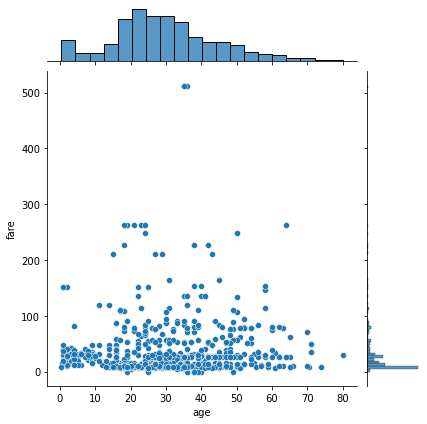

In [20]:
sns.jointplot(x='age', y='fare', data=dataset)

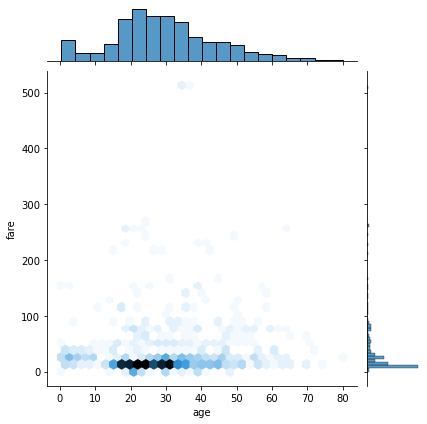

In [21]:
sns.jointplot(x='age', y='fare', data=dataset, kind='hex')